Se importan bibliotecas para el preprocesamiento de datos y análisis estadístico (como `pandas`, `numpy`, `MinMaxScaler`, `OneHotEncoder`, `SelectKBest`) y para visualización (`matplotlib`). Incluye también herramientas para dividir datos (`train_test_split`) y seleccionar características (`f_classif`, `mutual_info_classif`). Finalmente, carga los conjuntos de datos de características y objetivos desde archivos CSV, estableciendo la base para su posterior análisis y preparación para un modelo de aprendizaje automático.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from matplotlib import pyplot as plt

features = pd.read_csv('/kaggle/input/datos-sp500-1d/features.csv')
targets = pd.read_csv('/kaggle/input/datos-sp500-1d/targets.csv')

In [2]:
features

,06_RSI,07_RSI,08_RSI,09_RSI,10_RSI,11_RSI,12_RSI,13_RSI,14_RSI,15_RSI,...,11_MFI,12_MFI,13_MFI,14_MFI,15_MFI,16_MFI,17_MFI,18_MFI,19_MFI,20_MFI
0,22.237710,26.289180,29.703064,32.528756,34.843032,36.729008,38.264250,39.515793,40.539160,41.379274,...,37.727109,34.179591,40.061208,44.683410,41.672965,46.071092,49.940071,53.063409,55.522408,52.608805
1,40.077585,40.994197,42.027564,43.015101,43.890137,44.634255,45.251751,45.756269,46.164124,46.491202,...,46.382694,42.527902,38.810301,43.925601,47.991221,44.938968,48.874959,52.365105,55.201740,57.447148
2,33.293291,34.969746,36.599511,38.086005,39.391763,40.512894,41.462342,42.259952,42.927080,43.483951,...,37.655092,42.672005,39.387482,36.177935,41.179776,45.196093,42.478962,46.380988,49.866750,52.717827
3,31.682916,33.531248,35.295913,36.895875,38.300405,39.508795,40.535767,41.402391,42.131015,42.742739,...,28.147593,34.471945,39.332315,36.524882,33.748465,38.617658,42.564917,40.146479,43.998134,47.463337
4,43.792470,43.581306,43.788970,44.179642,44.627383,45.067659,45.470139,45.823125,46.124696,46.377732,...,27.037270,34.305315,39.632309,43.781544,40.870481,37.961288,42.250970,45.758120,43.295015,46.763846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,8.099320,10.581507,12.882000,14.965667,16.830313,18.489254,19.962291,21.271018,22.436434,23.477816,...,15.870226,14.380976,13.272351,19.222458,24.848869,28.661603,32.436806,35.380167,38.091919,37.364859
4495,5.801777,7.910012,9.950798,11.865363,13.629218,15.237344,16.695322,18.014058,19.206673,20.286714,...,16.495623,15.166900,13.801045,12.776846,18.552333,24.040975,27.775564,31.485570,34.386546,37.065824
4496,41.338301,39.580502,38.439849,37.702959,37.234486,36.946577,36.781292,36.699965,36.676548,36.693350,...,24.635040,22.698232,20.995509,19.223702,17.880556,23.019844,27.941071,31.310509,34.674695,37.317102
4497,45.785940,43.675825,42.225416,41.216290,40.508343,40.009387,39.657621,39.410998,39.240542,39.126045,...,24.455778,30.187127,27.975846,26.010433,23.943679,22.362047,26.971452,31.414989,34.474277,37.542620


In [3]:
targets

,Label
0,0
1,0
2,0
3,0
4,0
...,...
4494,0
4495,0
4496,0
4497,0


Se utiliza `np.unique` para identificar y contar valores únicos en `targets`. Almacena los valores únicos en `valores_unicos` y sus respectivos conteos en `conteos`, y luego los imprime, proporcionando una visión clara de la distribución de los datos objetivo.

In [4]:
valores_unicos, conteos = np.unique(targets, return_counts=True)

print(valores_unicos)  # Esto mostrará los valores únicos
print(conteos) 

[0 1 2]
[3957  273  269]



Se realiza la división de datos en conjuntos de entrenamiento, validación y prueba, y determina la proporción de división para el conjunto de entrenamiento.

In [5]:
list_features = list(features.columns)


print('Total number of features', len(list_features))

x_train, x_test, y_train, y_test = train_test_split(features.values, targets.values, train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=targets.values)


if 0.7*x_train.shape[0] < 2500:
    train_split = 0.8
else:
    train_split = 0.7
print('train_split =',train_split)

x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split, 
                                                random_state=2, shuffle=True, stratify=y_train)

Total number of features 345
train_split = 0.7


Se aplica la normalización de características y muestra las dimensiones de los conjuntos de datos.

In [6]:
mm_scaler = MinMaxScaler(feature_range=(0, 1)) 
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (2519, 345) (2519, 1) (1080, 345) (1080, 1) (900, 345) (900, 1)


Se vuelve a identificar y contar valores únicos.

In [7]:
# Usando np.unique para encontrar valores únicos y sus conteos
valores_unicos, conteos = np.unique(y_test, return_counts=True)

print(valores_unicos)  # Esto mostrará los valores únicos
print(conteos) 

[0 1 2]
[791  55  54]


Se seleccionan las características más relevantes utilizando el método ANOVA y se mide el tiempo de ejecución.

In [8]:
%%time

num_features = 225  # Debe de ser un cuadrado perfecto 15x15
topk = 320

select_k_best = SelectKBest(f_classif, k=topk)
select_k_best.fit(x_main, y_train)
    
selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
print(selected_features_anova)
print(select_k_best.get_support(indices=True))
    

('06_RSI', '07_RSI', '08_RSI', '09_RSI', '10_RSI', '11_RSI', '12_RSI', '13_RSI', '14_RSI', '15_RSI', '16_RSI', '17_RSI', '18_RSI', '19_RSI', '20_RSI', '06_WILLR', '07_WILLR', '08_WILLR', '09_WILLR', '10_WILLR', '11_WILLR', '12_WILLR', '13_WILLR', '14_WILLR', '15_WILLR', '16_WILLR', '17_WILLR', '18_WILLR', '19_WILLR', '20_WILLR', '06_BBH', '06_BBM', '06_BBL', '07_BBH', '07_BBM', '07_BBL', '08_BBH', '08_BBM', '08_BBL', '09_BBH', '09_BBM', '09_BBL', '10_BBM', '10_BBL', '11_BBM', '11_BBL', '12_BBM', '12_BBL', '13_BBM', '13_BBL', '14_BBL', '15_BBL', '16_BBL', '17_BBL', '18_BBL', '19_BBL', '20_BBL', '06_NATR', '07_NATR', '08_NATR', '09_NATR', '10_NATR', '11_NATR', '12_NATR', '13_NATR', '14_NATR', '15_NATR', '16_NATR', '17_NATR', '18_NATR', '19_NATR', '20_NATR', '06_PPO', '07_PPO', '08_PPO', '09_PPO', '10_PPO', '11_PPO', '12_PPO', '13_PPO', '14_PPO', '15_PPO', '16_PPO', '17_PPO', '18_PPO', '19_PPO', '20_PPO', '06_MACD', '06_SIGNAL', '06_HISTOGRAM', '07_MACD', '07_SIGNAL', '07_HISTOGRAM', '08_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Se realiza una selección de características utilizando la técnica de información mutua.

In [9]:
select_k_best = SelectKBest(mutual_info_classif, k=topk)
select_k_best.fit(x_main, y_train)

selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
print(len(selected_features_mic), selected_features_mic)
print(select_k_best.get_support(indices=True))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


320 ('06_RSI', '07_RSI', '08_RSI', '09_RSI', '10_RSI', '11_RSI', '12_RSI', '13_RSI', '14_RSI', '15_RSI', '16_RSI', '17_RSI', '18_RSI', '19_RSI', '20_RSI', '06_WILLR', '07_WILLR', '08_WILLR', '09_WILLR', '10_WILLR', '11_WILLR', '12_WILLR', '13_WILLR', '14_WILLR', '15_WILLR', '16_WILLR', '17_WILLR', '18_WILLR', '19_WILLR', '20_WILLR', '14_BBM', '14_BBL', '15_BBH', '15_BBM', '15_BBL', '16_BBH', '16_BBM', '16_BBL', '17_BBH', '17_BBM', '17_BBL', '18_BBH', '18_BBM', '18_BBL', '19_BBH', '19_BBM', '19_BBL', '20_BBH', '20_BBM', '20_BBL', '06_NATR', '07_NATR', '08_NATR', '09_NATR', '10_NATR', '11_NATR', '12_NATR', '13_NATR', '14_NATR', '15_NATR', '16_NATR', '17_NATR', '18_NATR', '19_NATR', '20_NATR', '06_PPO', '07_PPO', '08_PPO', '09_PPO', '10_PPO', '11_PPO', '12_PPO', '13_PPO', '14_PPO', '15_PPO', '16_PPO', '17_PPO', '18_PPO', '19_PPO', '20_PPO', '06_MACD', '06_SIGNAL', '06_HISTOGRAM', '07_MACD', '07_SIGNAL', '07_HISTOGRAM', '08_MACD', '08_SIGNAL', '08_HISTOGRAM', '09_MACD', '09_SIGNAL', '09_HI

Se identifica las características comunes seleccionadas por dos métodos diferentes (ANOVA y información mutua) y verifica si cumplen con un número requerido de características.

In [10]:
common = list(set(selected_features_anova).intersection(selected_features_mic))
print("common selected features", len(common), common)
if len(common) < num_features:
    raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
feat_idx = []
for c in common:
    feat_idx.append(list_features.index(c))
feat_idx = sorted(feat_idx[0:225])
print(feat_idx)

common selected features 300 ['06_WILLR', '12_SIGNAL', '09_MOM', '13_CMO', '20_WMA', '06_ROC', '19_ADOSC', '14_MFI', '14_PPO', '09_SIGNAL', '16_EMA', '12_HISTOGRAM', '18_ULTOSC', '16_WILLR', '10_slowk', '15_ADOSC', '12_ADX', '09_WILLR', '09_ULTOSC', '20_NATR', '06_MACD', '11_SIGNAL', '16_slowd', '20_ADOSC', '18_MFI', '07_MOM', '10_ROC', '08_slowd', '07_SIGNAL', '10_MFI', '06_CCI', '07_WMA', '13_ADX', '17_RSI', '14_RSI', '10_NATR', '13_ULTOSC', '14_MACD', '06_RSI', '17_ULTOSC', '20_MOM', '12_slowk', '17_MACD', '08_MOM', '09_MACD', '14_WMA', '18_PPO', '19_SIGNAL', '09_PPO', '10_MOM', '17_EMA', '10_ADOSC', '06_ADX', '19_EMA', '14_SIGNAL', '16_WMA', '09_ADX', '08_SMA', '07_CCI', '06_SIGNAL', '13_MOM', '16_ROC', '16_slowk', '16_CMO', '14_CMO', '11_HISTOGRAM', '06_HISTOGRAM', '14_ADX', '18_ADX', '18_BBL', '20_BBL', '07_MACD', '18_HISTOGRAM', '11_slowd', '15_MOM', '08_slowk', '15_BBL', '06_SMA', '06_EMA', '13_SIGNAL', '11_ROC', '11_WMA', '07_slowd', '20_MFI', '14_slowk', '17_slowk', '17_NATR'

Se filtra los conjuntos de entrenamiento, validación y prueba para incluir solo las características comunes seleccionadas, y luego muestra sus dimensiones.

In [11]:
x_train = x_train[:, feat_idx]
x_cv = x_cv[:, feat_idx]
x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (2519, 225) (2519, 1) (1080, 225) (1080, 1) (900, 225) (900, 1)


Se recuentan las labels, mostrando su peso en porcentajes.

In [12]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}, class 2 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100, _counts[2]/len(y_train) * 100))

percentage of class 0 = 87.97141722905914, class 1 = 6.073838824930529, class 2 = 5.954743946010321


 Se guarda los conjuntos de datos filtrados como archivos CSV.

In [13]:
np.savetxt("x_train.csv", x_train, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("x_cv.csv", x_cv, delimiter=",")
np.savetxt("y_cv.csv", y_cv, delimiter=",")
np.savetxt("x_test.csv", x_test, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")


Se transforma los conjuntos de datos en formato de imagen y ajusta su forma para su uso en un modelo de red neuronal convolucional (CNN).

In [14]:
def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

dim = int(np.sqrt(num_features))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (2519, 15, 15, 3) (2519, 1) (900, 15, 15, 3) (900, 1)


Se realiza la presentación de algunas imágenes de manera aleatoria.

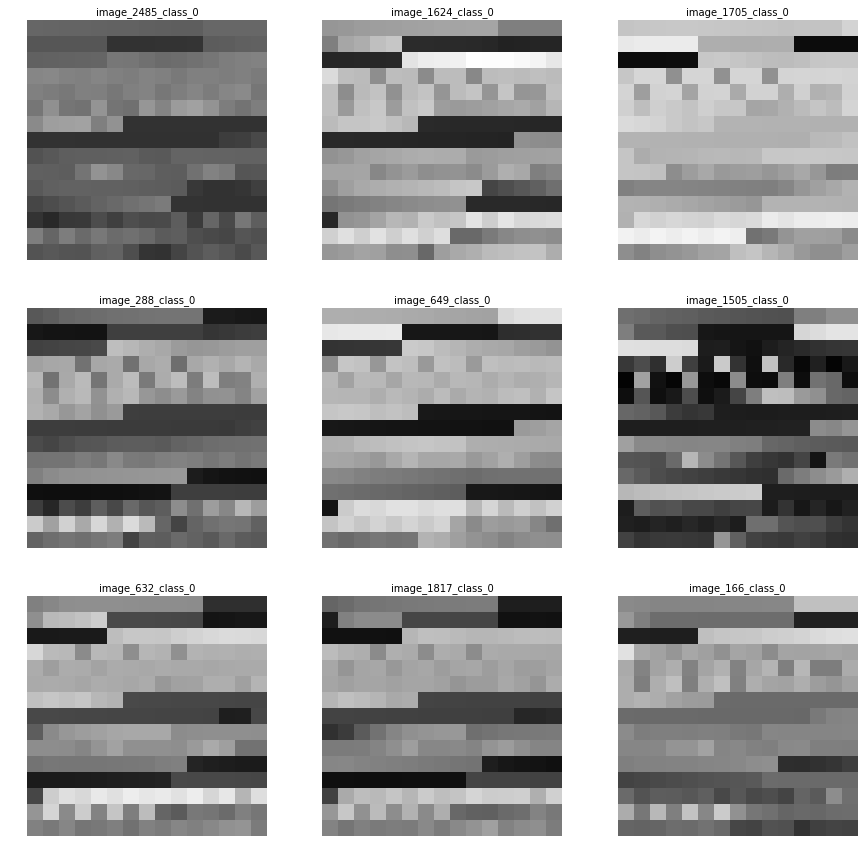

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()